# Preparando los datos

In [50]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np

In [51]:
# importamos el dataset
df = pd.read_csv('../Data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
# revisamos la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
# Cambiamos el tipo de dato de la columna TotalCharges a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [54]:
# verificamos que no haya valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [55]:
# eliminamos los valores nulos
df = df.dropna()

In [56]:
# eliminamos la columna customerID
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
# convertimos la variable Churn a numérica
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [58]:
# Creamos una copia del dataset
df_processing = df.copy()
# convertimos las variables categóricas a numéricas
df_processing = pd.get_dummies(df_processing, drop_first=True)
df_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Análisis de correlación y escalabilidad de los datos

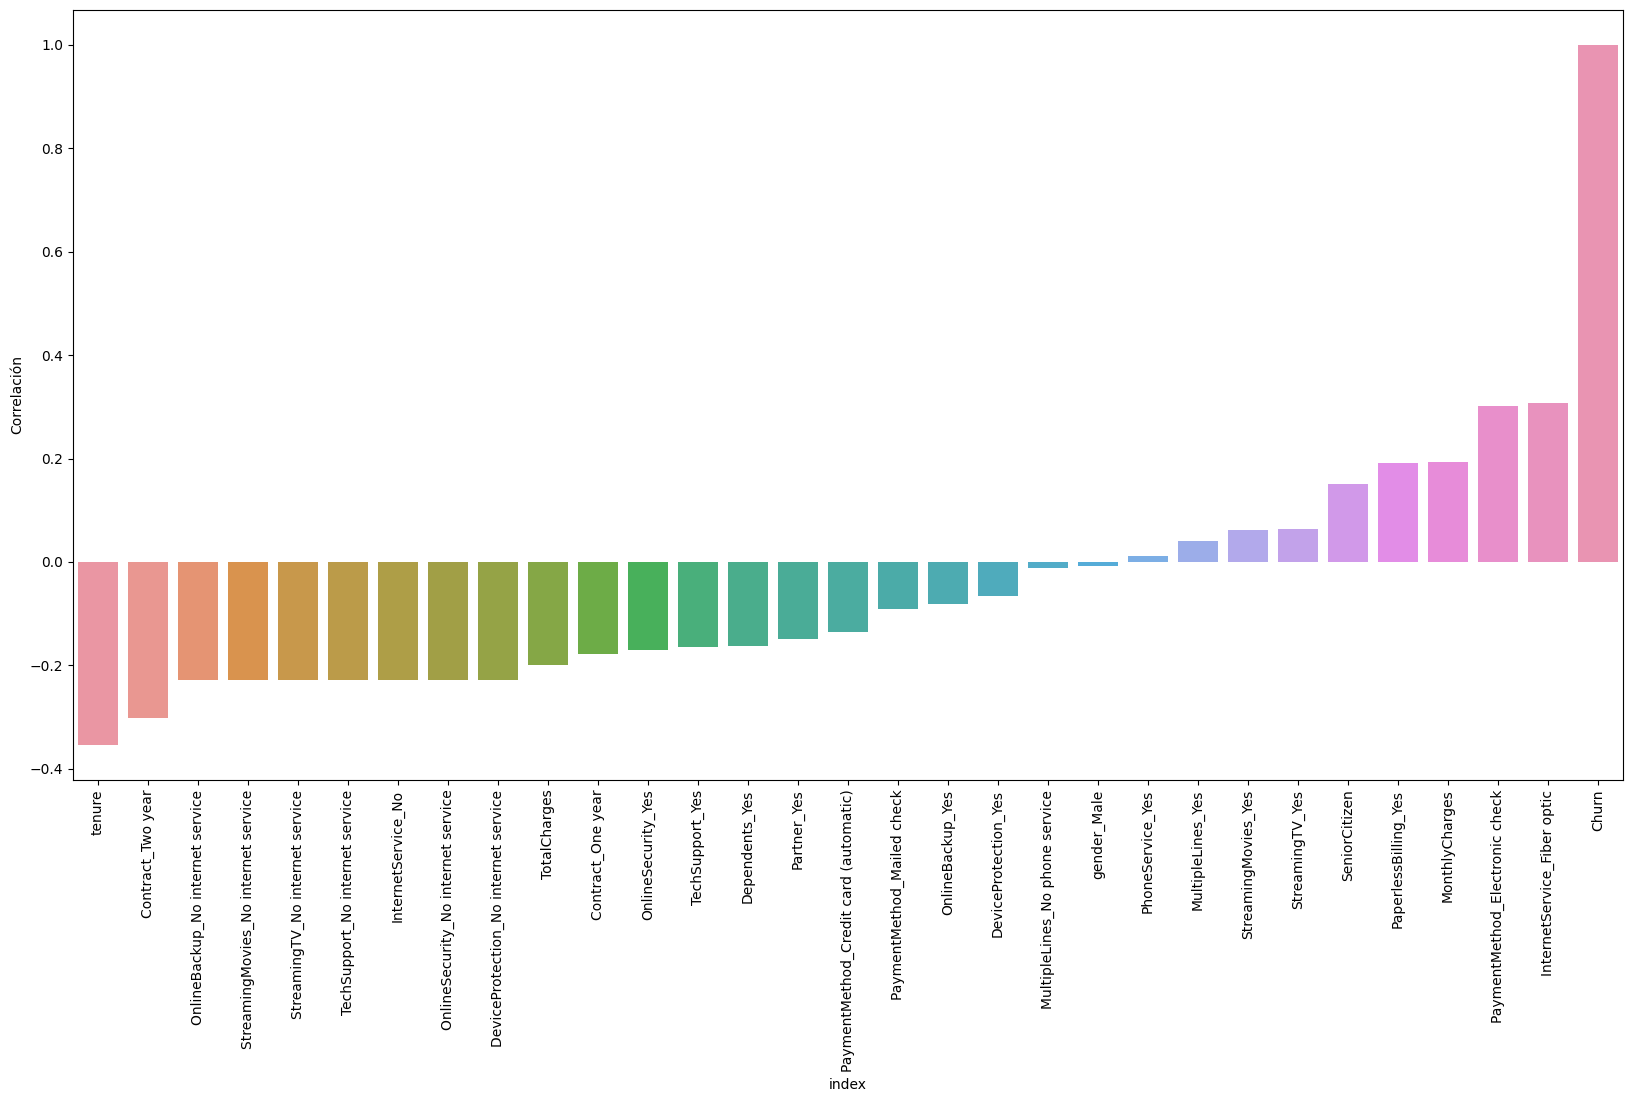

In [59]:
# visualizamos la correlación de las variables con la variable Churn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data_corr = pd.DataFrame(df_processing.corr()['Churn'].sort_values()).reset_index()
sns.barplot(x='index', y='Churn', data=data_corr)
plt.ylabel('Correlación')
plt.xticks(rotation=90);

In [60]:
# Escalamos las variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processing_escaled = pd.DataFrame(scaler.fit_transform(df_processing), columns=df_processing.columns)
df_processing_escaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Análisis exploratorio de datos

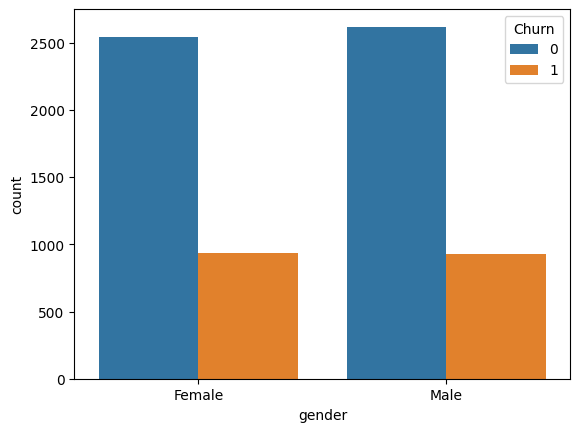

In [61]:
sns.countplot(data=df, x='gender', hue='Churn');

In [62]:
%run "Funciones auxiliares/Funciones_auxiliares.ipynb"

In [63]:
# obtenemos las variables categóricas
column_categorical = df.select_dtypes(include='object').columns
column_categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

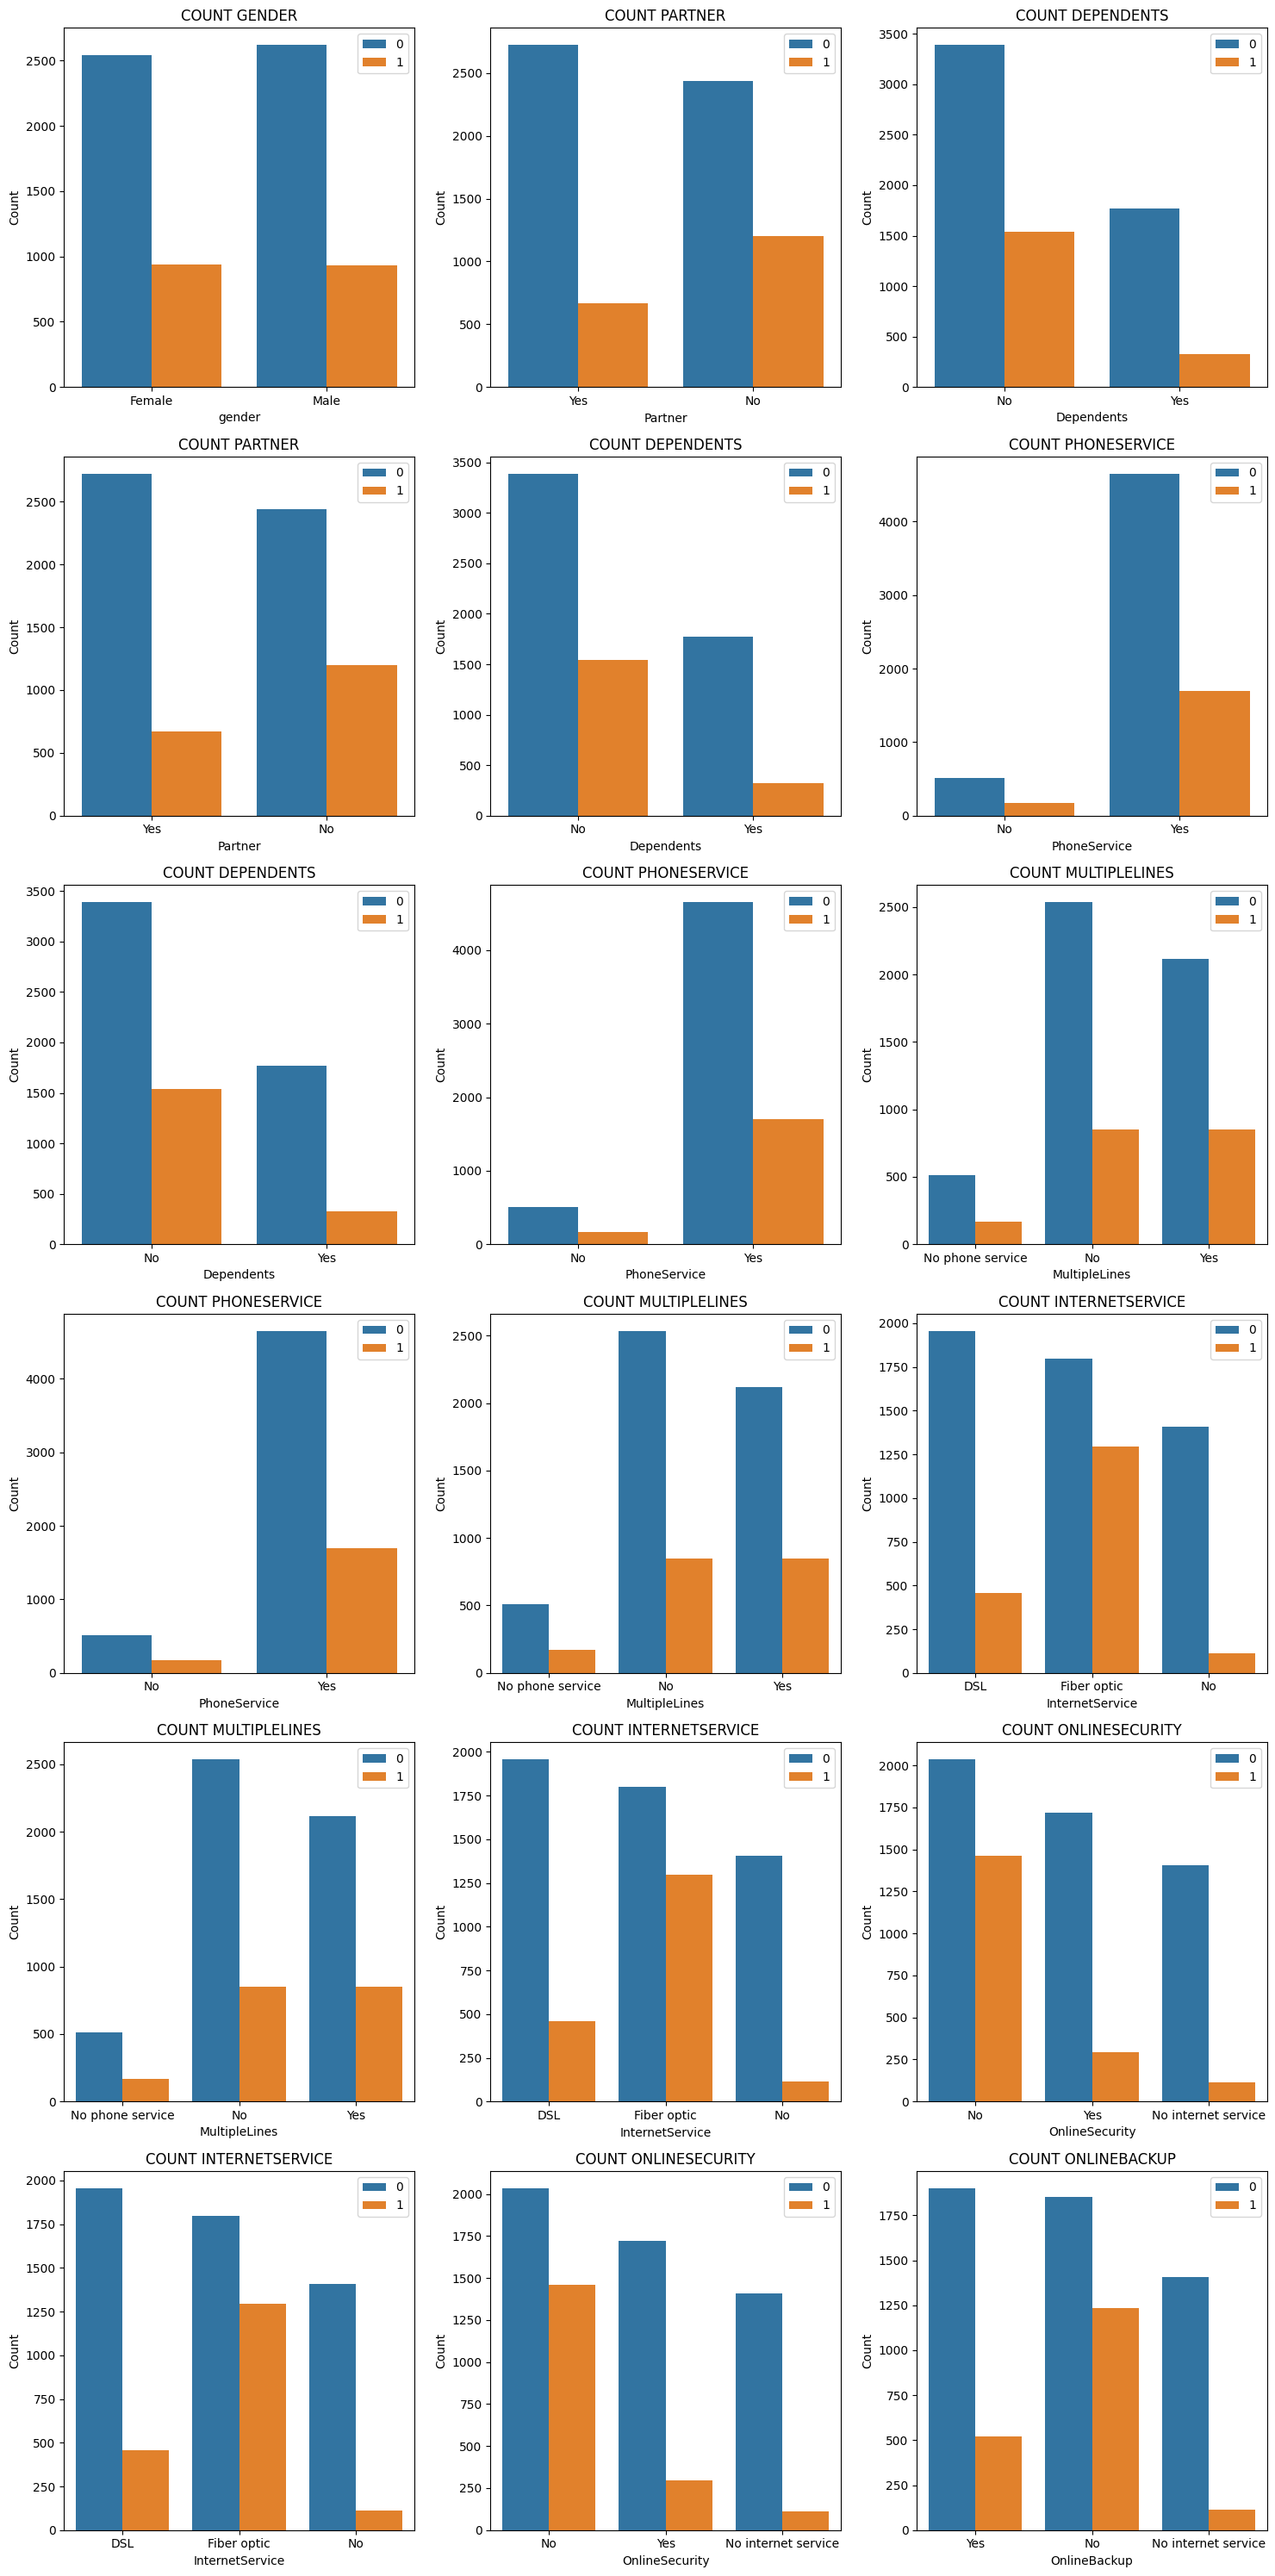

In [64]:
plot_categoricals(column_categorical, 3)

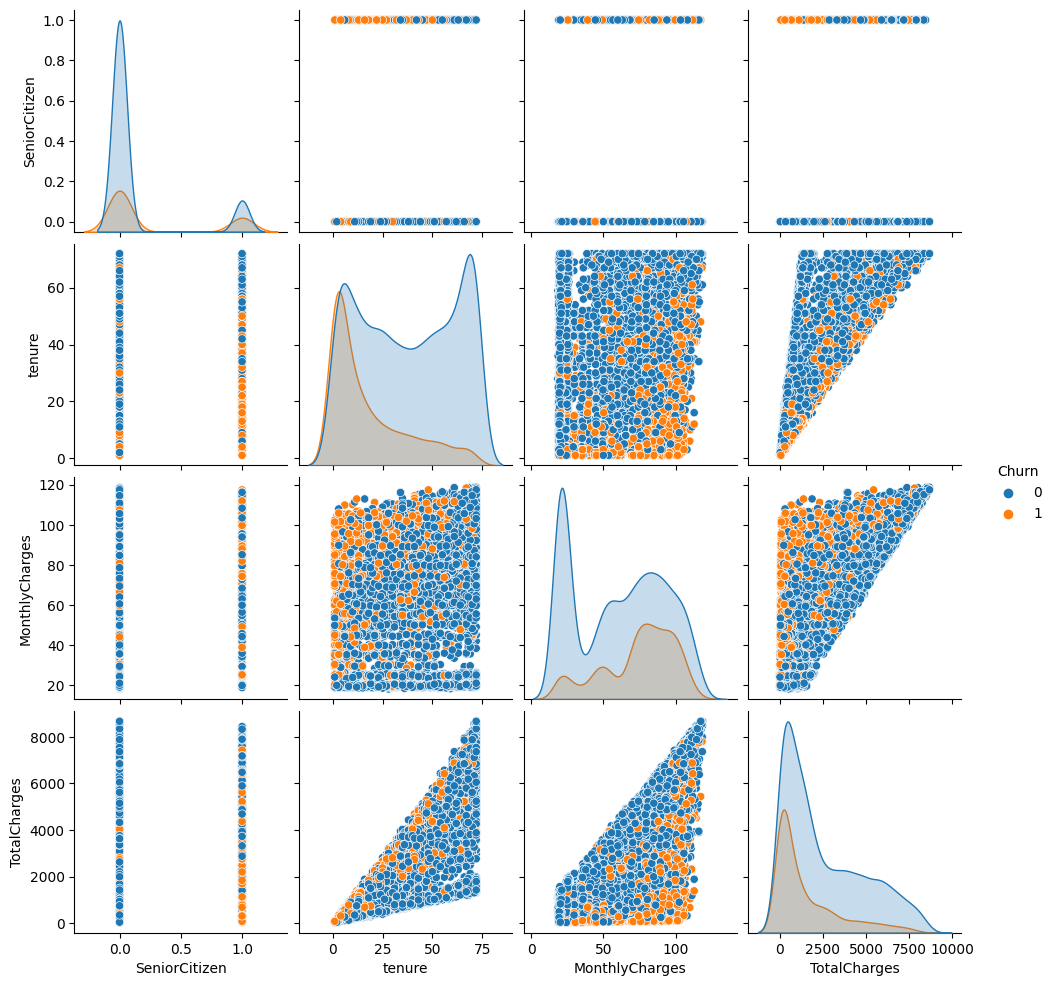

In [65]:
# Graficamos los datos numéricos
sns.pairplot(df, hue='Churn');

# Entrenamiento con regresión logística binomial

In [66]:
# definimos las variables X e y
X = df_processing_escaled.drop('Churn', axis=1)
y = df_processing_escaled['Churn'].values

# dividimos el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Entrenamos el modelo
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)

In [68]:
# Verificamos la precisión del modelo
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.795734597156398


# Análisis de resultados de regresión logística binomial

In [69]:
# Obtenemos las probabilidades de predicción
logreg.predict_proba(X_test)

array([[0.9900733 , 0.0099267 ],
       [0.86260748, 0.13739252],
       [0.30246025, 0.69753975],
       ...,
       [0.99015604, 0.00984396],
       [0.70085651, 0.29914349],
       [0.82812473, 0.17187527]])

In [70]:
# Obtenemos los coeficientes del modelo
logreg.coef_

array([[ 0.22035058, -3.12507861, -0.10677561,  1.20430842, -0.0231496 ,
         0.1211656 , -0.25563979, -0.22952716,  0.21292584,  0.21033512,
         0.91161368, -0.11549255, -0.11549255, -0.38784332, -0.11549255,
        -0.07610719, -0.11549255, -0.02221961, -0.11549255, -0.35122839,
        -0.11549255,  0.258926  , -0.11549255,  0.26175833, -0.82099263,
        -1.37880107,  0.20788667, -0.15752054,  0.21943162, -0.07633099]])

In [71]:
# Obtenemos el nombre de las variables
logreg.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

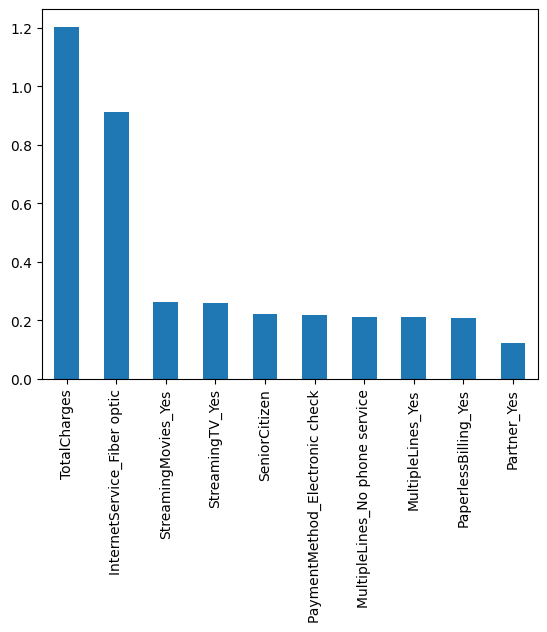

In [77]:
# Obtenemos el peso de las variables
weights = pd.Series(logreg.coef_[0], index=X.columns.values)

# Graficamos los 10 pesos más altos
weights.sort_values(ascending=False)[:10].plot(kind='bar');

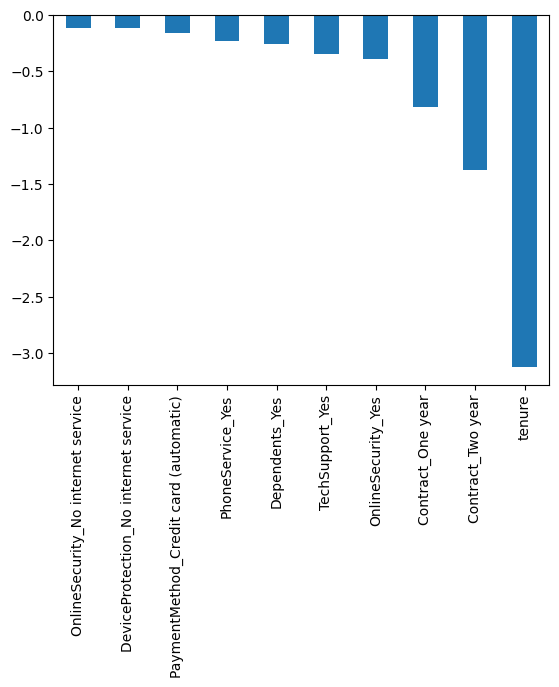

In [78]:
# Graficamos los 10 pesos más bajos
weights.sort_values(ascending=False)[-10:].plot(kind='bar');

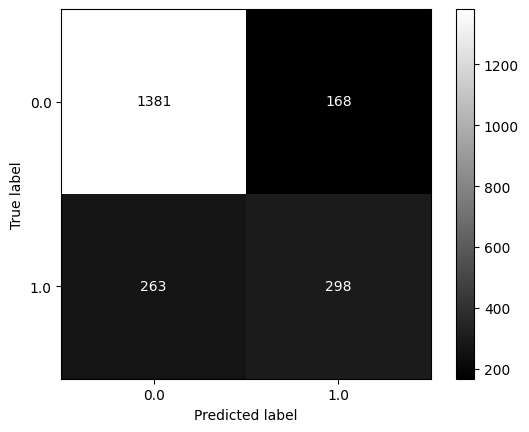

In [81]:
# Graficamos la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='gray');

# Regularización

## L1 Lasso

In [82]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.7971563981042654

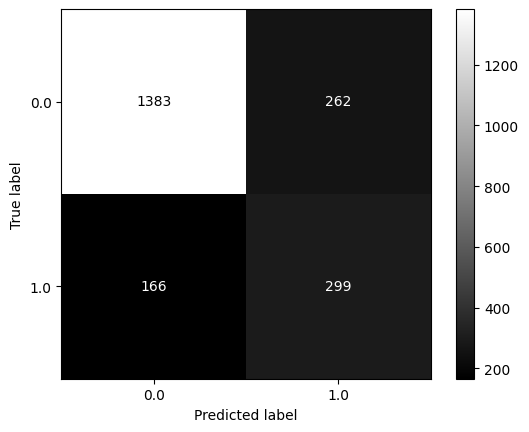

In [83]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='gray');

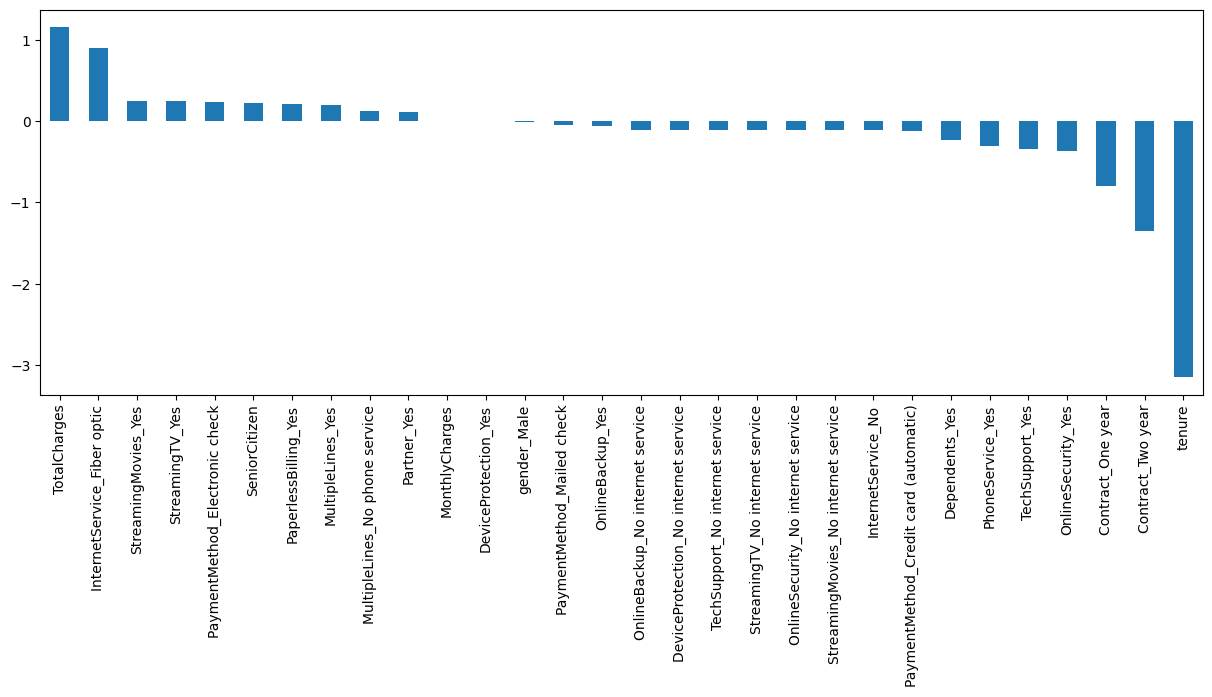

In [84]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

In [85]:
# mostramos cuáles de nuestros valores se volvieron cero
weights[weights==0]

MonthlyCharges    0.0
dtype: float64

## L2 Ridge

In [86]:
ridge=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.7966824644549763

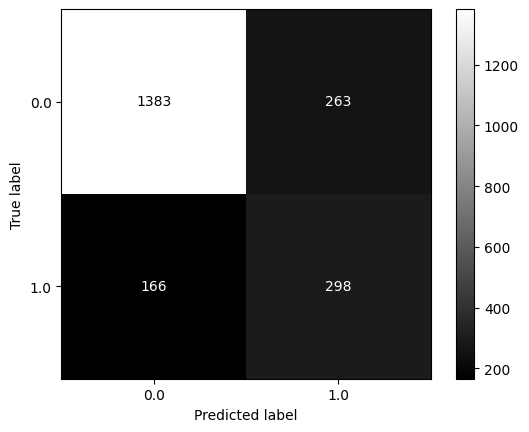

In [87]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='gray');

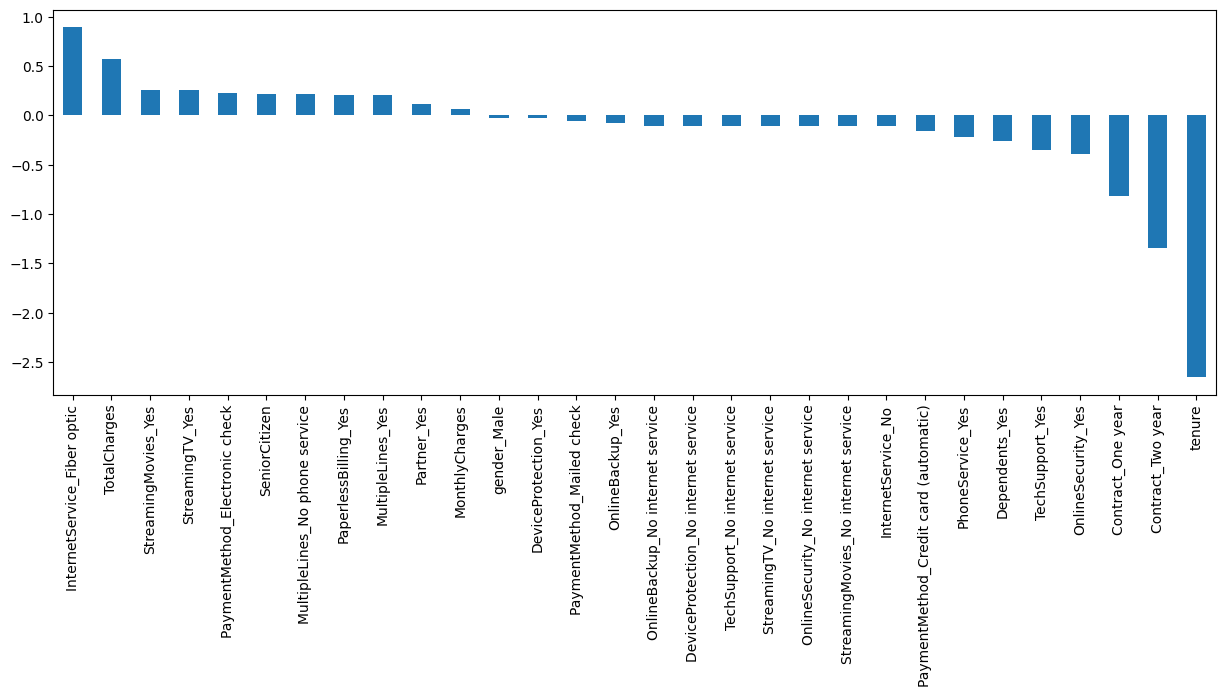

In [88]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');